In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Load Dataset

In [3]:
X_train = np.loadtxt('input.csv',delimiter =',')
Y_train = np.loadtxt('labels.csv',delimiter =',')

X_test = np.loadtxt('input_test.csv',delimiter =',')
Y_test = np.loadtxt('labels_test.csv',delimiter =',')


In [4]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
print("Shape of X_train : ",X_train.shape)
print("Shape of Y_train : ",Y_train.shape)
print("Shape of X_test : ",X_test.shape)
print("Shape of Y_test : ",Y_test.shape)

Shape of X_train :  (2000, 100, 100, 3)
Shape of Y_train :  (2000, 1)
Shape of X_test :  (400, 100, 100, 3)
Shape of Y_test :  (400, 1)


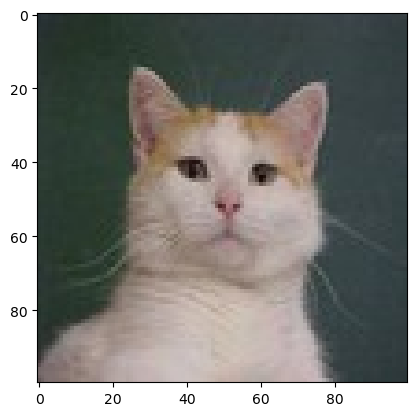

In [6]:
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

# Model

In [7]:
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu',input_shape = (100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64,activation = 'relu'),
    Dense(1,activation = 'sigmoid')
])

D:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model2 = Sequential()

model2.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (100,100,3)))
model2.add(MaxPooling2D((2,2)))
           
model2.add(Conv2D(32,(3,3),activation = 'relu'))
model2.add(MaxPooling2D((2,2)))

model2.add(Flatten())
model2.add(Dense(64,activation = 'relu'))  
model2.add(Dense(1,activation = 'sigmoid'))        

In [9]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [10]:
model.fit(X_train, Y_train,epochs = 5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 104ms/step - accuracy: 0.4981 - loss: 0.7095
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.5866 - loss: 0.6618
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.6872 - loss: 0.5849
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6854 - loss: 0.5816
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7599 - loss: 0.4980


In [11]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7837 - loss: 0.4788


[0.6478952169418335, 0.6650000214576721]

# Making Predictions


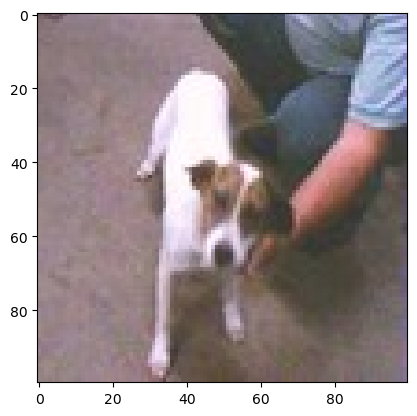

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
Model says it is a  Dog


In [12]:
idx2  = random.randint(0,len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1,100,100,3))
y_pred = y_pred >0.5

if(y_pred == 0):
    pred = 'Dog'
else:
    pred = "Cat"
print("Model says it is a ",pred )

In [13]:
model.save('cat_dog_model.h5')